In [1]:
import sys 
sys.path.append('../') 
import numpy as np 
import matplotlib.pyplot as plt 
from VQE_simplified import VQE
from qiskit.providers.aer import AerSimulator 
from qiskit import IBMQ, Aer 
from qiskit.circuit.library import EfficientSU2 
from qiskit.algorithms import NumPyMinimumEigensolver 
from qiskit.algorithms.optimizers import SPSA 
from qiskit.compiler import transpile 
from utils import get_backend_connectivity, H2, LiH, BeH2, H2O, C2H2


In [2]:
IBMQ.load_account()
provider      = IBMQ.get_provider(hub='ibm-q-csic', group='internal', project='iff-csic') 
backend_exp   = provider.get_backend('ibmq_guadalupe')  
#backend_sim = Aer.get_backend( 'aer_simulator' ) 
backend_sim = AerSimulator.from_backend(backend_exp) 

In [25]:
H, circuit_init = H2O(initial_state=True, freeze_core=True) 
min_energy = NumPyMinimumEigensolver( ).compute_minimum_eigenvalue(H).eigenvalue
num_qubits = H.num_qubits 
WC = get_backend_connectivity(backend_exp)
WC = [ indx for indx in WC if indx[0]<num_qubits and indx[1]<num_qubits ]
num_qubits

8

In [26]:
num_qubits

8

In [5]:
maxiter = 150
optimizer = SPSA(maxiter=maxiter)
params = 0.01*np.ones(4*num_qubits)

In [19]:
solver = VQE( circuit_init, optimizer, params, backend_sim, conectivity=WC, grouping = 'TPB' )
solver.grouping(H)
len( solver._Measurements )

93

In [17]:
solver = VQE( circuit_init, optimizer, params, backend_sim, conectivity=WC, grouping = 'EM' )
solver.grouping(H)
len( solver._Measurements )

48

In [18]:
solver = VQE( circuit_init, optimizer, params, backend_sim, conectivity=WC, grouping = 'HEEM' )
solver.grouping(H)
len( solver._Measurements )

62

C:\Users\lucia\miniconda3\lib\site-packages\numpy\ma\core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\lucia\miniconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


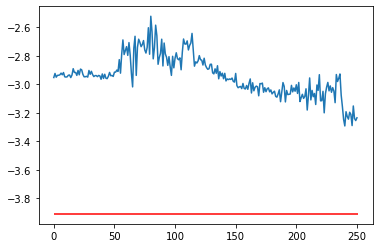

In [12]:
evaluations_tpb = []
def back( ExpVal, params ):
    evaluations_tpb.append(ExpVal)
solver = VQE( circuit_init, optimizer, params, backend_sim, conectivity=WC, back=back, grouping = 'TPB' )
results_tpb = solver.compute_minimum_eigenvalue(H)
plt.plot( evaluations_tpb )
plt.hlines(min_energy,0,len(evaluations_tpb),'r')

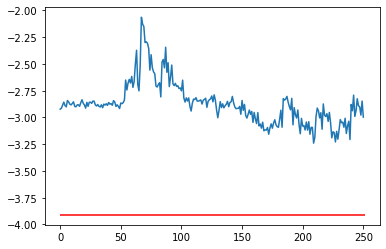

In [13]:
evaluations_em = []
def back( ExpVal, params ):
    evaluations_em.append(ExpVal)
solver = VQE( circuit_init, optimizer, params, backend_sim, conectivity=WC, back=back, grouping = 'EM' )
results_em = solver.compute_minimum_eigenvalue(H)
plt.plot( evaluations_em )
plt.hlines(min_energy,0,len(evaluations_em),'r')

c:\Users\lucia\Nextcloud\Programas\Github\Hardware-efficient-variational-quantum-eigensolver-with-entangled-measurements\Codes\experiments\..\HEEM_VQE_Functions.py:294: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  circuit.u2(0, np.pi / 2, qubits[0])


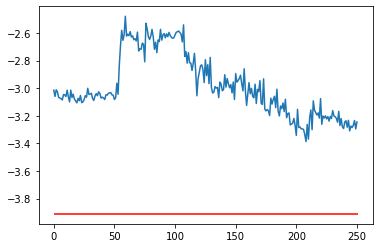

In [14]:
evaluations_heem = []
def back( ExpVal, params ):
    evaluations_heem.append(ExpVal)
solver = VQE( circuit_init, optimizer, params, backend_sim, conectivity=WC, back=back,grouping = 'HEEM' )
results_heem = solver.compute_minimum_eigenvalue(H)
plt.plot( evaluations_heem )
plt.hlines(min_energy,0,len(evaluations_heem),'r')

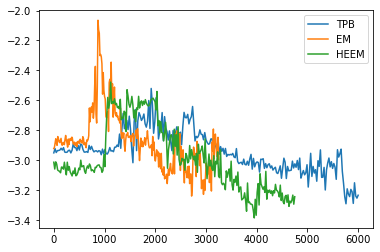

In [15]:
plt.plot( 24*np.arange(51+2*maxiter), evaluations_tpb )
plt.plot( 13*np.arange(51+2*maxiter),evaluations_em )
plt.plot( 19*np.arange(51+2*maxiter),evaluations_heem )
plt.legend( ['TPB','EM','HEEM'] )